# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Loading the Data and Selecting the Features

### Import Data

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0, low_memory=False)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0,  low_memory=False)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0, low_memory=False)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0,  low_memory=False)

### Explore Data

In [3]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
431128,431128,12565323,14577475,4500,4500,4500.00,36 months,10.99,147.31,B,...,0,0,0,1,0,0,0,0,0,0
413015,413015,13617819,15670114,25000,25000,25000.00,60 months,18.92,647.42,D,...,0,0,0,1,0,0,0,0,0,0
90236,90236,7275417,8917525,17000,17000,17000.00,60 months,24.99,498.88,F,...,0,1,0,1,0,0,0,0,0,0
122060,122060,5975009,7447154,16000,16000,16000.00,36 months,13.05,539.49,B,...,0,0,0,1,0,0,0,0,0,0
41491,41491,352357,355394,1500,1100,341.89,36 months,10.64,35.83,B,...,0,0,0,1,0,0,0,0,0,0


In [4]:
loan_data_targets_train.head()

,good_bad
431128,1
413015,1
90236,1
122060,1
41491,1


In [5]:
loan_data_inputs_train.shape

(373004, 324)

In [6]:
loan_data_targets_train.shape

(373004, 1)

In [7]:
loan_data_inputs_test.shape

(93252, 324)

In [8]:
loan_data_targets_test.shape

(93252, 1)

### Selecting the Features

In [9]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [10]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [11]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
431128,False,True,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
413015,False,False,False,True,False,False,False,False,1,False,...,1,0,0,0,1,0,0,0,0,0
90236,False,False,False,False,False,True,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
122060,False,True,False,False,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
41491,False,True,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


# PD Model Estimation

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [13]:
reg = LogisticRegression()
# We create an instance of an object from the 'LogisticRegression' class.

In [14]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [15]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

f:\anaconda3\envs\Udemycreditriskmodel\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
f:\anaconda3\envs\Udemycreditriskmodel\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
reg.intercept_
# Displays the intercept contain in the estimated ("fitted") object from the 'LogisticRegression' class.

array([-1.40703316])

In [17]:
reg.coef_
# Displays the coefficients contained in the estimated ("fitted") object from the 'LogisticRegression' class.

array([[ 1.09294644e+00,  8.59977501e-01,  6.62230494e-01,
         4.80972470e-01,  3.16396664e-01,  1.63005293e-01,
         7.22245120e-02,  1.09199320e-01,  5.17106578e-02,
         6.31831309e-02,  6.96049774e-02,  7.75255570e-02,
         7.92945822e-02,  1.48318889e-01,  1.20015105e-01,
         1.77973785e-01,  2.71360688e-01,  2.62822652e-01,
         2.89539879e-01,  3.43727864e-01,  5.24350854e-01,
         8.78158561e-02, -1.23341014e-02,  3.25582526e-01,
         2.00626057e-01,  2.20152280e-01,  2.88127818e-01,
         4.97652481e-02,  7.71121379e-02,  1.13625160e-01,
         1.37521480e-01,  1.03203136e-01,  7.37578350e-02,
         1.36064062e-01,  1.11058253e+00,  8.82459090e-01,
         8.02985783e-01,  5.65143984e-01,  4.20327251e-01,
         1.75713639e-01, -7.95431865e-02,  9.32349400e-01,
         5.84875694e-01,  3.29795864e-01,  1.22597942e-01,
         6.21055347e-02,  3.48654808e-02,  6.71528525e-02,
         1.16961727e-01,  1.12108216e-01,  8.44326567e-0

In [18]:
feature_name = inputs_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [19]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,-1.407033
1,grade:A,1.092946
2,grade:B,0.859978
3,grade:C,0.662230
4,grade:D,0.480972
5,grade:E,0.316397
6,grade:F,0.163005
7,home_ownership:OWN,0.072225
8,home_ownership:MORTGAGE,0.109199
9,addr_state:NM_VA,0.051711


## Build a Logistic Regression Model with P-Values

In [20]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X.astype(np.float64) / denom).T, X.astype(np.float64))  # Ensure X is of dtype float64
        Cramer_Rao = np.linalg.inv(F_ij)
        # F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        # Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [21]:
reg = LogisticRegression_with_p_values()
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.

In [22]:
pd.set_option('display.max_rows', None)

In [23]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

f:\anaconda3\envs\Udemycreditriskmodel\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
f:\anaconda3\envs\Udemycreditriskmodel\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.407033
1,grade:A,1.092946
2,grade:B,0.859978
3,grade:C,0.662230
4,grade:D,0.480972
5,grade:E,0.316397
6,grade:F,0.163005
7,home_ownership:OWN,0.072225
8,home_ownership:MORTGAGE,0.109199
9,addr_state:NM_VA,0.051711


In [25]:
# This is a list.
p_values = reg.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.

In [26]:
# Add the intercept for completeness.
p_values = np.append(np.nan, np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.

In [27]:
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.

In [28]:
summary_table['significant'] = np.where(summary_table['p_values'] < 0.05, 'True', 'False')
summary_table.sample(5)

,Feature name,Coefficients,p_values,significant
59,open_acc:18-22,-0.176317,2.931093e-01,False
92,dti:20.3-21.7,0.183305,4.773954e-03,True
65,total_acc:28-51,-0.038129,7.258610e-03,True
101,mths_since_last_record:21-31,0.451689,1.169640e-04,True
14,addr_state:AR_MI_PA_OH_MN,0.148319,4.182869e-11,True


In [29]:
# Extract the characters before ':' and group by them
summary_table['Group'] = summary_table['Feature name'].str.split(':').str[0]
summary_table.sample(5)

,Feature name,Coefficients,p_values,significant,Group
101,mths_since_last_record:21-31,0.451689,1.169640e-04,True,mths_since_last_record
92,dti:20.3-21.7,0.183305,4.773954e-03,True,dti
43,int_rate:9.548-12.025,0.584876,9.782399e-39,True,int_rate
68,total_rev_hi_lim:5K-10K,0.022258,3.651490e-01,False,total_rev_hi_lim
30,emp_length:1,0.113625,1.210026e-05,True,emp_length


In [30]:
# Count the 'True' values for each group
group_counts = summary_table.groupby('Group')['significant'].sum().reset_index()
group_counts.sample(5)

,Group,significant
9,initial_list_status,True
13,mths_since_issue_d,TrueTrueTrueTrueTrueTrueTrue
15,mths_since_last_record,TrueTrueTrueTrueTrueTrue
17,pub_rec,FalseFalse
19,term,True


In [31]:
group_counts['trueornot'] = np.where(group_counts['significant'].str.contains('True'), 1 ,0)
group_counts.sample(5)

,Group,significant,trueornot
16,open_acc,FalseFalseFalseFalseFalseFalseFalse,0
19,term,True,1
2,addr_state,FalseTrueTrueTrueTrueTrueTrueTrueTrueTrueTrueT...,1
3,annual_inc,FalseFalseTrueTrueTrueTrueTrueTrueTrueTrueTrue,1
11,int_rate,TrueTrueTrueTrue,1


In [32]:
summary_tab = summary_table.merge(group_counts, left_on='Group', right_on='Group', how='left')
summary_tab.sample(5)

,Feature name,Coefficients,p_values,significant_x,Group,significant_y,trueornot
29,term:36,0.077112,5.515378e-08,True,term,True,1
12,addr_state:CA,0.077526,2.550490e-04,True,addr_state,FalseTrueTrueTrueTrueTrueTrueTrueTrueTrueTrueT...,1
86,dti:<=1.4,0.263426,2.906226e-03,True,dti,TrueTrueTrueTrueTrueTrueTrueTrueFalse,1
91,dti:16.1-20.3,0.186654,2.825002e-03,True,dti,TrueTrueTrueTrueTrueTrueTrueTrueFalse,1
31,emp_length:2-4,0.137521,2.900340e-13,True,emp_length,TrueTrueTrueTrueTrue,1


In [33]:
# summary_tab.drop(columns=['significant_y'], inplace=True)
summary_tab.rename(columns={'significant_x':'significant'}, inplace = True)


In [34]:
summary_tab

,Feature name,Coefficients,p_values,significant,Group,significant_y,trueornot
0,Intercept,-1.407033,NaN,False,Intercept,False,0
1,grade:A,1.092946,7.785961e-33,True,grade,TrueTrueTrueTrueTrueTrue,1
2,grade:B,0.859978,9.170083e-45,True,grade,TrueTrueTrueTrueTrueTrue,1
3,grade:C,0.662230,2.132510e-31,True,grade,TrueTrueTrueTrueTrueTrue,1
4,grade:D,0.480972,5.205226e-19,True,grade,TrueTrueTrueTrueTrueTrue,1
5,grade:E,0.316397,5.820160e-11,True,grade,TrueTrueTrueTrueTrueTrue,1
6,grade:F,0.163005,1.231920e-03,True,grade,TrueTrueTrueTrueTrueTrue,1
7,home_ownership:OWN,0.072225,3.171764e-04,True,home_ownership,TrueTrue,1
8,home_ownership:MORTGAGE,0.109199,8.724547e-18,True,home_ownership,TrueTrue,1
9,addr_state:NM_VA,0.051711,1.060834e-01,False,addr_state,FalseTrueTrueTrueTrueTrueTrueTrueTrueTrueTrueT...,1


In [35]:
# Group by 'Group' and count 'True' and 'False' in 'significant' column
grouped_counts = summary_tab.groupby(['Group', 'significant'])['Feature name'].count().unstack(fill_value=0)

# Rename columns for clarity
grouped_counts.columns = ['False_count', 'True_count']

# Reset the index to make 'Group' a regular column
grouped_counts = grouped_counts.reset_index()

In [40]:
grouped_counts

,Group,groupcount
0,Intercept,1
1,acc_now_delinq,1
2,addr_state,13
3,annual_inc,11
4,delinq_2yrs,2
5,dti,9
6,emp_length,5
7,grade,6
8,home_ownership,2
9,initial_list_status,1


In [41]:
summary_tab = summary_tab.merge(grouped_counts, left_on='Group', right_on='Group', how='left')
summary_tab

,Feature name,Coefficients,p_values,significant,Group,significant_y,trueornot,False_count,True_count,groupcount
0,Intercept,-1.407033,NaN,False,Intercept,False,0,1,0,1
1,grade:A,1.092946,7.785961e-33,True,grade,TrueTrueTrueTrueTrueTrue,1,0,6,6
2,grade:B,0.859978,9.170083e-45,True,grade,TrueTrueTrueTrueTrueTrue,1,0,6,6
3,grade:C,0.662230,2.132510e-31,True,grade,TrueTrueTrueTrueTrueTrue,1,0,6,6
4,grade:D,0.480972,5.205226e-19,True,grade,TrueTrueTrueTrueTrueTrue,1,0,6,6
5,grade:E,0.316397,5.820160e-11,True,grade,TrueTrueTrueTrueTrueTrue,1,0,6,6
6,grade:F,0.163005,1.231920e-03,True,grade,TrueTrueTrueTrueTrueTrue,1,0,6,6
7,home_ownership:OWN,0.072225,3.171764e-04,True,home_ownership,TrueTrue,1,0,2,2
8,home_ownership:MORTGAGE,0.109199,8.724547e-18,True,home_ownership,TrueTrue,1,0,2,2
9,addr_state:NM_VA,0.051711,1.060834e-01,False,addr_state,FalseTrueTrueTrueTrueTrueTrueTrueTrueTrueTrueT...,1,1,12,13


In [37]:
grouped_counts = summary_tab.groupby('Group')['Feature name'].count()
# Rename columns for clarity
grouped_counts.columns = ['groupcount']
# Reset the index to make 'Group' a regular column
grouped_counts = grouped_counts.reset_index()
grouped_counts.rename(columns={'Feature name':'groupcount'}, inplace = True)
grouped_counts

,Group,groupcount
0,Intercept,1
1,acc_now_delinq,1
2,addr_state,13
3,annual_inc,11
4,delinq_2yrs,2
5,dti,9
6,emp_length,5
7,grade,6
8,home_ownership,2
9,initial_list_status,1


In [ ]:
summary_tab = summary_tab.merge(grouped_counts, left_on='Group', right_on='Group', how='left')
summary_tab

In [42]:
summary_tab.columns

Index(['Feature name', 'Coefficients', 'p_values', 'significant', 'Group',
       'significant_y', 'trueornot', 'False_count', 'True_count',
       'groupcount'],
      dtype='object')

In [46]:
summary_tab[summary_tab['Group']=='total_rev_hi_lim']

,Feature name,Coefficients,p_values,significant,Group,significant_y,trueornot,False_count,True_count,groupcount
68,total_rev_hi_lim:5K-10K,0.022258,0.365149,False,total_rev_hi_lim,FalseFalseFalseFalseFalseFalseTrue,1,6,1,7
69,total_rev_hi_lim:10K-20K,0.008220,0.730401,False,total_rev_hi_lim,FalseFalseFalseFalseFalseFalseTrue,1,6,1,7
70,total_rev_hi_lim:20K-30K,0.010861,0.678883,False,total_rev_hi_lim,FalseFalseFalseFalseFalseFalseTrue,1,6,1,7
71,total_rev_hi_lim:30K-40K,0.000499,0.986460,False,total_rev_hi_lim,FalseFalseFalseFalseFalseFalseTrue,1,6,1,7
72,total_rev_hi_lim:40K-55K,0.054228,0.092618,False,total_rev_hi_lim,FalseFalseFalseFalseFalseFalseTrue,1,6,1,7
73,total_rev_hi_lim:55K-95K,0.063685,0.077096,False,total_rev_hi_lim,FalseFalseFalseFalseFalseFalseTrue,1,6,1,7
74,total_rev_hi_lim:>95K,0.193820,0.000611,True,total_rev_hi_lim,FalseFalseFalseFalseFalseFalseTrue,1,6,1,7


In [50]:
summary_tab['selectioncriteria'] = np.where(round(summary_tab['True_count']/summary_tab['groupcount'], 2) < 0.2, 0, 1)
summary_tab

,Feature name,Coefficients,p_values,significant,Group,significant_y,trueornot,False_count,True_count,groupcount,selectioncriteria
0,Intercept,-1.407033,NaN,False,Intercept,False,0,1,0,1,0
1,grade:A,1.092946,7.785961e-33,True,grade,TrueTrueTrueTrueTrueTrue,1,0,6,6,1
2,grade:B,0.859978,9.170083e-45,True,grade,TrueTrueTrueTrueTrueTrue,1,0,6,6,1
3,grade:C,0.662230,2.132510e-31,True,grade,TrueTrueTrueTrueTrueTrue,1,0,6,6,1
4,grade:D,0.480972,5.205226e-19,True,grade,TrueTrueTrueTrueTrueTrue,1,0,6,6,1
5,grade:E,0.316397,5.820160e-11,True,grade,TrueTrueTrueTrueTrueTrue,1,0,6,6,1
6,grade:F,0.163005,1.231920e-03,True,grade,TrueTrueTrueTrueTrueTrue,1,0,6,6,1
7,home_ownership:OWN,0.072225,3.171764e-04,True,home_ownership,TrueTrue,1,0,2,2,1
8,home_ownership:MORTGAGE,0.109199,8.724547e-18,True,home_ownership,TrueTrue,1,0,2,2,1
9,addr_state:NM_VA,0.051711,1.060834e-01,False,addr_state,FalseTrueTrueTrueTrueTrueTrueTrueTrueTrueTrueT...,1,1,12,13,1


In [56]:
print("The total rows in summary_tab table is:\t",len(summary_tab))
print("The total rows in summary_tab table where the selectioncriteria is 1:\t", len(summary_tab[summary_tab['selectioncriteria'] == 1]))
print("The total rows in summary_tab table where the selectioncriteria is 0:\t", len(summary_tab[summary_tab['selectioncriteria'] == 0]))

The total rows in summary_tab table is:	 105
The total rows in summary_tab table where the selectioncriteria is 1:	 85
The total rows in summary_tab table where the selectioncriteria is 0:	 20


In [57]:
print("The columns to exclude after first iterations are:\t",summary_tab['Feature name'][summary_tab['selectioncriteria'] == 0].unique())

The columns to exclude after first iterations are:	 ['Intercept' 'delinq_2yrs:0' 'delinq_2yrs:1-3' 'open_acc:1-3'
 'open_acc:4-12' 'open_acc:13-17' 'open_acc:18-22' 'open_acc:23-25'
 'open_acc:26-30' 'open_acc:>=31' 'pub_rec:3-4' 'pub_rec:>=5'
 'acc_now_delinq:>=1' 'total_rev_hi_lim:5K-10K' 'total_rev_hi_lim:10K-20K'
 'total_rev_hi_lim:20K-30K' 'total_rev_hi_lim:30K-40K'
 'total_rev_hi_lim:40K-55K' 'total_rev_hi_lim:55K-95K'
 'total_rev_hi_lim:>95K']


In [58]:
print("The columns to include after first iterations are:\t",summary_tab['Feature name'][summary_tab['selectioncriteria'] == 1].unique())

The columns to include after first iterations are:	 ['grade:A' 'grade:B' 'grade:C' 'grade:D' 'grade:E' 'grade:F'
 'home_ownership:OWN' 'home_ownership:MORTGAGE' 'addr_state:NM_VA'
 'addr_state:NY' 'addr_state:OK_TN_MO_LA_MD_NC' 'addr_state:CA'
 'addr_state:UT_KY_AZ_NJ' 'addr_state:AR_MI_PA_OH_MN'
 'addr_state:RI_MA_DE_SD_IN' 'addr_state:GA_WA_OR' 'addr_state:WI_MT'
 'addr_state:TX' 'addr_state:IL_CT' 'addr_state:KS_SC_CO_VT_AK_MS'
 'addr_state:WV_NH_WY_DC_ME_ID' 'verification_status:Not Verified'
 'verification_status:Source Verified' 'purpose:credit_card'
 'purpose:debt_consolidation' 'purpose:oth__med__vacation'
 'purpose:major_purch__car__home_impr' 'initial_list_status:w' 'term:36'
 'emp_length:1' 'emp_length:2-4' 'emp_length:5-6' 'emp_length:7-9'
 'emp_length:10' 'mths_since_issue_d:<38' 'mths_since_issue_d:38-39'
 'mths_since_issue_d:40-41' 'mths_since_issue_d:42-48'
 'mths_since_issue_d:49-52' 'mths_since_issue_d:53-64'
 'mths_since_issue_d:65-84' 'int_rate:<9.548' 'int_rate:9.5

In [59]:
print("The Group to exclude after first iterations are:\t",summary_tab['Group'][summary_tab['selectioncriteria'] == 0].unique())
print("The Group to include after first iterations are:\t",summary_tab['Group'][summary_tab['selectioncriteria'] == 1].unique())

The Group to exclude after first iterations are:	 ['Intercept' 'delinq_2yrs' 'open_acc' 'pub_rec' 'acc_now_delinq'
 'total_rev_hi_lim']
The Group to include after first iterations are:	 ['grade' 'home_ownership' 'addr_state' 'verification_status' 'purpose'
 'initial_list_status' 'term' 'emp_length' 'mths_since_issue_d' 'int_rate'
 'mths_since_earliest_cr_line' 'inq_last_6mths' 'total_acc' 'annual_inc'
 'dti' 'mths_since_last_delinq' 'mths_since_last_record']


In [ ]:
summary_table.to_excel("Summary_logisticregressionwithpvalue.xlsx")

In [60]:
summary_tab.to_excel("Summary_logisticregressionwithpvalueandselectioncriteriadefined.xlsx", index = False)

In [62]:
# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not tatistically significant.

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

# Variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [63]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [64]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
431128,False,True,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
413015,False,False,False,True,False,False,False,False,1,False,...,1,0,0,0,1,0,0,0,0,0
90236,False,False,False,False,False,True,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
122060,False,True,False,False,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
41491,False,True,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


In [65]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

f:\anaconda3\envs\Udemycreditriskmodel\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
f:\anaconda3\envs\Udemycreditriskmodel\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
feature_name = inputs_train.columns.values

In [72]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.461507
1,grade:A,1.095858
2,grade:B,0.855118
3,grade:C,0.657372
4,grade:D,0.478447
5,grade:E,0.315083
6,grade:F,0.162163
7,home_ownership:OWN,0.073842
8,home_ownership:MORTGAGE,0.107316
9,addr_state:NM_VA,0.058589


In [73]:
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table
# Here we get the results for our final PD model.

,Feature name,Coefficients,p_values
0,Intercept,-1.461507,NaN
1,grade:A,1.095858,3.634202e-33
2,grade:B,0.855118,1.366137e-44
3,grade:C,0.657372,2.622250e-31
4,grade:D,0.478447,3.818008e-19
5,grade:E,0.315083,2.867491e-11
6,grade:F,0.162163,9.976025e-04
7,home_ownership:OWN,0.073842,2.258225e-04
8,home_ownership:MORTGAGE,0.107316,2.285390e-17
9,addr_state:NM_VA,0.058589,6.696356e-02


In [74]:
import pickle 

In [75]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

# PD Model Validation (Test)

### Out-of-sample validation (test)

In [76]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [77]:
# And here, in the list below, we keep the variable names for the reference categories,
# only for the variables we used in our final PD model.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [78]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
53955,False,True,False,False,False,False,False,True,1,False,...,0,1,0,0,1,0,0,0,0,0
73769,False,False,True,False,False,False,False,False,0,False,...,0,0,0,1,1,0,0,0,0,0
101802,False,False,False,True,False,False,False,False,0,False,...,1,0,0,0,1,0,0,0,0,0
122556,False,True,False,False,False,False,False,False,0,False,...,1,0,0,0,0,0,0,0,1,0
390263,True,False,False,False,False,False,True,False,0,False,...,0,0,1,0,1,0,0,0,0,0


In [79]:
y_hat_test = reg2.model.predict(inputs_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [81]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [82]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [84]:
y_hat_test_proba
# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the first class, i.e. 1.

array([[0.07293804, 0.92706196],
       [0.09479221, 0.90520779],
       [0.19276966, 0.80723034],
       ...,
       [0.17223462, 0.82776538],
       [0.1016232 , 0.8983768 ],
       [0.09105743, 0.90894257]])

In [85]:
y_hat_test_proba[:][:,1]
# Here we take all the arrays in the array, and from each array, we take all rows, and only the element with index 1,
# that is, the second element.
# In other words, we take only the probabilities for being 1.

array([0.92706196, 0.90520779, 0.80723034, ..., 0.82776538, 0.8983768 ,
       0.90894257])

In [86]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
# We store these probabilities in a variable.

In [87]:
y_hat_test_proba
# This variable contains an array of probabilities of being 1.

array([0.92706196, 0.90520779, 0.80723034, ..., 0.82776538, 0.8983768 ,
       0.90894257])

In [88]:
loan_data_targets_test_temp = loan_data_targets_test

In [89]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.

In [90]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes.

In [91]:
df_actual_predicted_probs.shape

(93252, 2)

In [92]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [95]:
df_actual_predicted_probs.index = loan_data_inputs_test.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [97]:
df_actual_predicted_probs.sample(10)

,loan_data_targets_test,y_hat_test_proba
157338,1,0.901139
361060,1,0.910071
325372,1,0.924599
327330,1,0.985609
253429,1,0.901197
17360,0,0.770802
264901,1,0.889951
219305,0,0.849495
229865,0,0.841062
103314,1,0.863714


### Accuracy and Area under the Curve

When the cutoff is 0.5

In [98]:
tr = 0.5
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [99]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,7,10135
1,4,83106


In [100]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted,0,1
Actual,,
0,0.000075,0.108684
1,0.000043,0.891198


In [102]:
print("The Accuracy of model is :\t",(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1])
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

The Accuracy of model is :	 0.8912731094239266


In [103]:
from sklearn.metrics import roc_curve, roc_auc_score

In [104]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

(array([0.       , 0.       , 0.       , ..., 0.9999014, 1.       ,
        1.       ]),
 array([0.00000000e+00, 1.20322464e-05, 9.62579714e-05, ...,
        9.99987968e-01, 9.99987968e-01, 1.00000000e+00]),
 array([       inf, 0.99276993, 0.99130812, ..., 0.39812943, 0.39442921,
        0.37925043]))

In [105]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

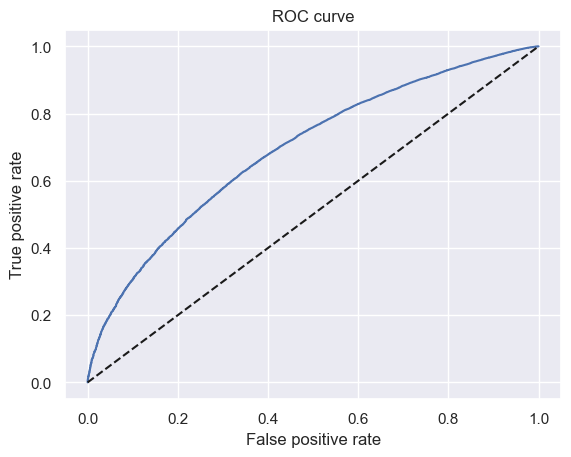

In [107]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [108]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.6937510993275822

When the cutoff is 0.4

In [114]:
tr = 0.4
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [115]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,1,10141
1,2,83108


In [116]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted,0,1
Actual,,
0,0.000011,0.108748
1,0.000021,0.891219


In [117]:
print("The Accuracy of model is :\t",(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1])
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

The Accuracy of model is :	 0.8912302149015571


In [118]:
from sklearn.metrics import roc_curve, roc_auc_score

In [119]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

(array([0.       , 0.       , 0.       , ..., 0.9999014, 1.       ,
        1.       ]),
 array([0.00000000e+00, 1.20322464e-05, 9.62579714e-05, ...,
        9.99987968e-01, 9.99987968e-01, 1.00000000e+00]),
 array([       inf, 0.99276993, 0.99130812, ..., 0.39812943, 0.39442921,
        0.37925043]))

In [120]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

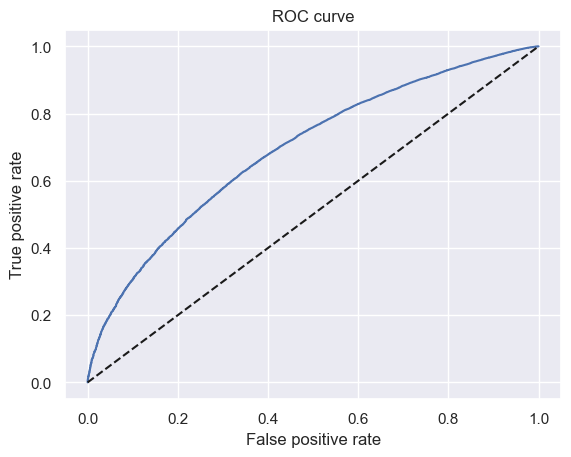

In [122]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [123]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.6937510993275822

In [137]:
g=2*AUROC-1
g

0.38750219865516433

When the cutoff is 0.7

In [124]:
tr = 0.7
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [125]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,587,9555
1,1208,81902


In [126]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted,0,1
Actual,,
0,0.006295,0.102464
1,0.012954,0.878287


In [127]:
print("The Accuracy of model is :\t",(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1])
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

The Accuracy of model is :	 0.8845815639342856


In [128]:
from sklearn.metrics import roc_curve, roc_auc_score

In [129]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

(array([0.       , 0.       , 0.       , ..., 0.9999014, 1.       ,
        1.       ]),
 array([0.00000000e+00, 1.20322464e-05, 9.62579714e-05, ...,
        9.99987968e-01, 9.99987968e-01, 1.00000000e+00]),
 array([       inf, 0.99276993, 0.99130812, ..., 0.39812943, 0.39442921,
        0.37925043]))

In [130]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

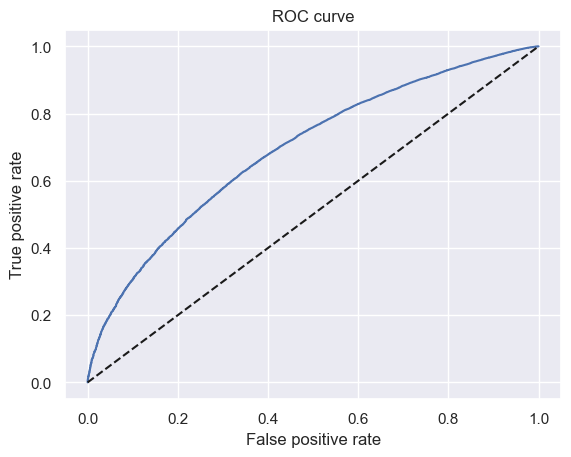

In [132]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.a
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [133]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.6937510993275822

In [135]:
g = 2*AUROC - 1
g

0.38750219865516433

When the cutoff is 0.9

In [138]:
tr = 0.9
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [139]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,7173,2969
1,35844,47266


In [140]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted,0,1
Actual,,
0,0.076921,0.031838
1,0.384378,0.506863


In [141]:
print("The Accuracy of model is :\t",(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1])
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

The Accuracy of model is :	 0.583783725818213


In [142]:
from sklearn.metrics import roc_curve, roc_auc_score

In [143]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

(array([0.       , 0.       , 0.       , ..., 0.9999014, 1.       ,
        1.       ]),
 array([0.00000000e+00, 1.20322464e-05, 9.62579714e-05, ...,
        9.99987968e-01, 9.99987968e-01, 1.00000000e+00]),
 array([       inf, 0.99276993, 0.99130812, ..., 0.39812943, 0.39442921,
        0.37925043]))

In [144]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

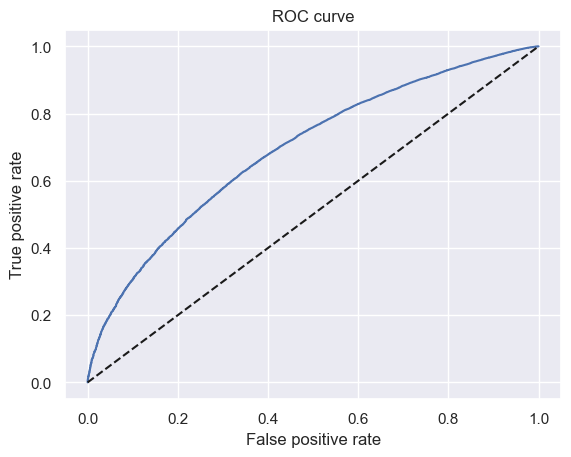

In [146]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [147]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.6937510993275822

In [148]:
g = 2*AUROC - 1
g

0.38750219865516433

### Gini and Kolmogorov-Smirnov

In [149]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
# Sorts a dataframe by the values of a specific column.

In [150]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42341,1,0.379250,0
39810,0,0.394429,0
42344,1,0.398129,0
42396,0,0.453229,0
40518,0,0.454284,0


In [151]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
260907,1,0.991464,1
231463,1,0.991562,1
232642,1,0.991604,1
247902,1,0.992731,1
251159,1,0.992770,1


In [152]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
# We reset the index of a dataframe and overwrite it.

In [153]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.379250,0
1,39810,0,0.394429,0
2,42344,1,0.398129,0
3,42396,0,0.453229,0
4,40518,0,0.454284,0


In [154]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [155]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42341,1,0.379250,0,1,1,0
1,39810,0,0.394429,0,2,1,1
2,42344,1,0.398129,0,3,2,1
3,42396,0,0.453229,0,4,2,2
4,40518,0,0.454284,0,5,2,3


In [156]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [157]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.379250,0,1,1,0,0.000011,0.000012,0.000000
1,39810,0,0.394429,0,2,1,1,0.000021,0.000012,0.000099
2,42344,1,0.398129,0,3,2,1,0.000032,0.000024,0.000099
3,42396,0,0.453229,0,4,2,2,0.000043,0.000024,0.000197
4,40518,0,0.454284,0,5,2,3,0.000054,0.000024,0.000296


In [158]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
93247,260907,1,0.991464,1,93248,83106,10142,0.999957,0.999952,1.0
93248,231463,1,0.991562,1,93249,83107,10142,0.999968,0.999964,1.0
93249,232642,1,0.991604,1,93250,83108,10142,0.999979,0.999976,1.0
93250,247902,1,0.992731,1,93251,83109,10142,0.999989,0.999988,1.0
93251,251159,1,0.992770,1,93252,83110,10142,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

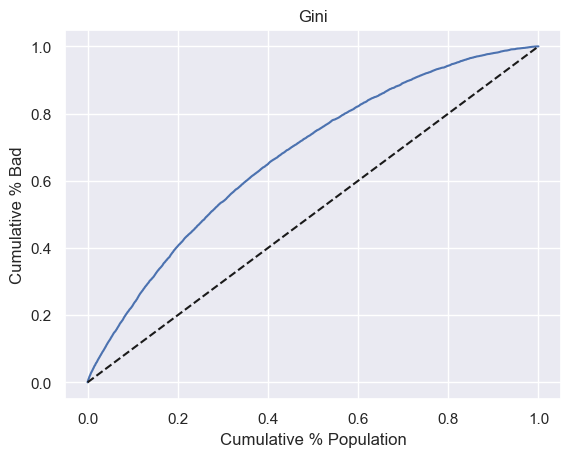

In [159]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [160]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.38750219865516433

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

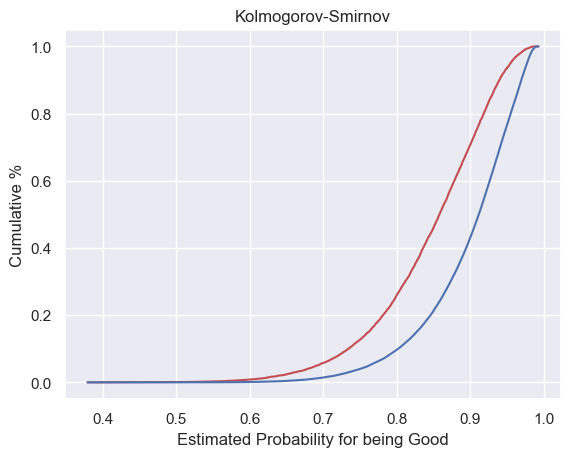

In [161]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [162]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.28223541912281525

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def calculate_ks(y_true, y_prob):
    """
    Calculate the Kolmogorov-Smirnov (KS) statistic.

    Parameters:
    y_true: array-like, shape (n_samples,)
        True binary labels (0 or 1).
    y_prob: array-like, shape (n_samples,)
        Predicted probabilities for the positive class.

    Returns:
    ks_statistic: float
        KS statistic value.
    ks_threshold: float
        Threshold where the KS statistic is achieved.
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    ks_values = np.abs(tpr - fpr)
    ks_index = np.argmax(ks_values)
    ks_statistic = ks_values[ks_index]
    ks_threshold = thresholds[ks_index]

    return print(f'KS Statistic: {ks_statistic:.4f} at Threshold={ks_threshold:.4f}')

def plot_ks_curve(y_true, y_prob):
    """
    Plot the KS curve for a binary classification model.

    Parameters:
    y_true: array-like, shape (n_samples,)
        True binary labels (0 or 1).
    y_prob: array-like, shape (n_samples,)
        Predicted probabilities for the positive class.

    Returns:
    None
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)

    ks_statistic, ks_threshold = calculate_ks(y_true, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, tpr, label='True Positive Rate (Sensitivity)')
    plt.plot(thresholds, fpr, label='False Positive Rate')
    plt.plot(ks_threshold, tpr[np.argmax(tpr - fpr)], 'ro', label=f'Max KS (Threshold={ks_threshold:.3f})')
    plt.xlabel('Threshold')
    plt.ylabel('Rate')
    plt.title('KS Curve')
    plt.legend()
    plt.grid()
    plt.show()

# Example usage:
# Replace y_true and y_prob with your actual labels and predicted probabilities
# y_true = ...
# y_prob = ...
# ks_statistic, ks_threshold = calculate_ks(y_true, y_prob)
# print(f'KS Statistic: {ks_statistic:.4f} at Threshold={ks_threshold:.4f}')
# plot_ks_curve(y_true, y_prob)


In [168]:
y_hat_test


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [175]:
calculate_ks(loan_data_targets_test, y_hat_test_proba)

KS Statistic: 0.2822 at Threshold=0.8899


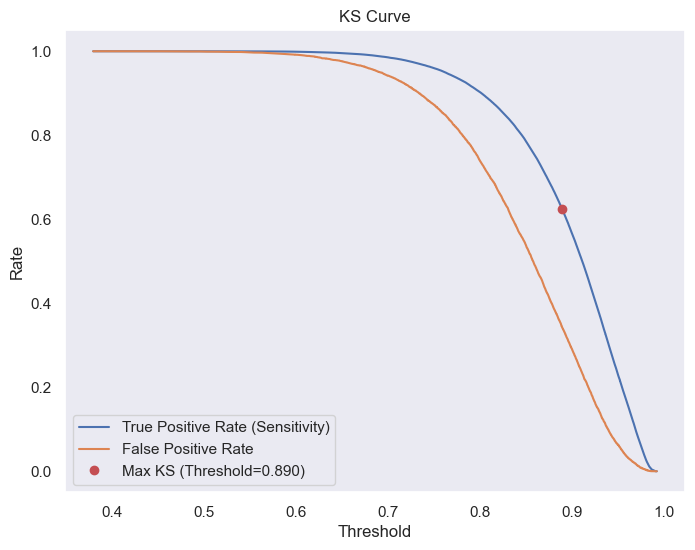

In [170]:
plot_ks_curve(loan_data_targets_test, y_hat_test_proba)

# Applying the PD Model

### Calculating PD of individual accounts

In [176]:
pd.options.display.max_columns = None
# Sets the pandas dataframe options to display all columns/ rows.

In [177]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
53955,False,True,False,False,False,False,False,0,False,True,0,1,False,0,False,0,0,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
73769,False,False,True,False,False,False,False,1,False,False,1,0,False,0,False,0,0,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
101802,False,False,False,True,False,False,False,1,False,False,0,0,False,0,False,0,0,0,0,0,False,0,1,0,True,False,False,0,False,True,0,0,True,False,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
122556,False,True,False,False,False,False,False,1,False,False,0,0,False,0,False,0,1,0,0,0,False,0,0,0,True,False,False,0,False,True,0,0,True,False,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
390263,True,False,False,False,False,False,False,0,True,False,0,0,False,0,False,0,0,0,0,0,True,0,0,0,True,False,False,0,False,True,0,0,True,False,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0


In [178]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.461507,NaN
1,grade:A,1.095858,3.634202e-33
2,grade:B,0.855118,1.366137e-44
3,grade:C,0.657372,2.622250e-31
4,grade:D,0.478447,3.818008e-19
5,grade:E,0.315083,2.867491e-11
6,grade:F,0.162163,9.976025e-04
7,home_ownership:OWN,0.073842,2.258225e-04
8,home_ownership:MORTGAGE,0.107316,2.285390e-17
9,addr_state:NM_VA,0.058589,6.696356e-02


In [179]:
y_hat_test_proba

array([0.92706196, 0.90520779, 0.80723034, ..., 0.82776538, 0.8983768 ,
       0.90894257])

### Creating a Scorecard

In [180]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.461507,NaN
1,grade:A,1.095858,3.634202e-33
2,grade:B,0.855118,1.366137e-44
3,grade:C,0.657372,2.622250e-31
4,grade:D,0.478447,3.818008e-19
5,grade:E,0.315083,2.867491e-11
6,grade:F,0.162163,9.976025e-04
7,home_ownership:OWN,0.073842,2.258225e-04
8,home_ownership:MORTGAGE,0.107316,2.285390e-17
9,addr_state:NM_VA,0.058589,6.696356e-02


In [181]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [182]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# We name it 'Feature name'.
df_ref_categories['Coefficients'] = 0
# We create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['p_values'] = np.nan
# We create a third column, called 'p_values', with contains only NaN values.
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [183]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
# Concatenates two dataframes.
df_scorecard = df_scorecard.reset_index()
# We reset the index of a dataframe.
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.461507,NaN
1,1,grade:A,1.095858,3.634202e-33
2,2,grade:B,0.855118,1.366137e-44
3,3,grade:C,0.657372,2.622250e-31
4,4,grade:D,0.478447,3.818008e-19
5,5,grade:E,0.315083,2.867491e-11
6,6,grade:F,0.162163,9.976025e-04
7,7,home_ownership:OWN,0.073842,2.258225e-04
8,8,home_ownership:MORTGAGE,0.107316,2.285390e-17
9,9,addr_state:NM_VA,0.058589,6.696356e-02


In [184]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.

In [185]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.461507,NaN,Intercept
1,1,grade:A,1.095858,3.634202e-33,grade
2,2,grade:B,0.855118,1.366137e-44,grade
3,3,grade:C,0.657372,2.622250e-31,grade
4,4,grade:D,0.478447,3.818008e-19,grade
5,5,grade:E,0.315083,2.867491e-11,grade
6,6,grade:F,0.162163,9.976025e-04,grade
7,7,home_ownership:OWN,0.073842,2.258225e-04,home_ownership
8,8,home_ownership:MORTGAGE,0.107316,2.285390e-17,home_ownership
9,9,addr_state:NM_VA,0.058589,6.696356e-02,addr_state


In [186]:
min_score = 300
max_score = 850

In [187]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.

Original feature name
Intercept                     -1.461507
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.047850
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.080101
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
purpose                        0.000000
term                           0.000000
verification_status           -0.012777
Name: Coefficients, dtype: float64

In [188]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the minimum values.
min_sum_coef

-1.6022352593301281

In [189]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()
# Groups the data by the values of the 'Oriaginal feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.

Original feature name
Intercept                     -1.461507
acc_now_delinq                 0.147011
addr_state                     0.527655
annual_inc                     0.589505
dti                            0.424955
emp_length                     0.137690
grade                          1.095858
home_ownership                 0.107316
initial_list_status            0.048967
inq_last_6mths                 0.626355
int_rate                       0.938421
mths_since_earliest_cr_line    0.115619
mths_since_issue_d             1.123184
mths_since_last_delinq         0.147671
mths_since_last_record         0.564324
purpose                        0.322331
term                           0.074593
verification_status            0.085510
Name: Coefficients, dtype: float64

In [190]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the maximum values.
max_sum_coef

5.615460768317134

In [191]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# We multiply the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.461507,NaN,Intercept,-111.369195
1,1,grade:A,1.095858,3.634202e-33,grade,83.506155
2,2,grade:B,0.855118,1.366137e-44,grade,65.161346
3,3,grade:C,0.657372,2.622250e-31,grade,50.092772
4,4,grade:D,0.478447,3.818008e-19,grade,36.458432
5,5,grade:E,0.315083,2.867491e-11,grade,24.009798
6,6,grade:F,0.162163,9.976025e-04,grade,12.357054
7,7,home_ownership:OWN,0.073842,2.258225e-04,home_ownership,5.626850
8,8,home_ownership:MORTGAGE,0.107316,2.285390e-17,home_ownership,8.177643
9,9,addr_state:NM_VA,0.058589,6.696356e-02,addr_state,4.464595


In [197]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score. 
df_scorecard

C:\Users\dcgzb\AppData\Local\Temp\ipykernel_19072\1410049194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.461507,NaN,Intercept,310.723699
1,1,grade:A,1.095858,3.634202e-33,grade,83.506155
2,2,grade:B,0.855118,1.366137e-44,grade,65.161346
3,3,grade:C,0.657372,2.622250e-31,grade,50.092772
4,4,grade:D,0.478447,3.818008e-19,grade,36.458432
5,5,grade:E,0.315083,2.867491e-11,grade,24.009798
6,6,grade:F,0.162163,9.976025e-04,grade,12.357054
7,7,home_ownership:OWN,0.073842,2.258225e-04,home_ownership,5.626850
8,8,home_ownership:MORTGAGE,0.107316,2.285390e-17,home_ownership,8.177643
9,9,addr_state:NM_VA,0.058589,6.696356e-02,addr_state,4.464595


In [198]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# We round the values of the 'Score - Calculation' column.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.461507,NaN,Intercept,310.723699,311.0
1,1,grade:A,1.095858,3.634202e-33,grade,83.506155,84.0
2,2,grade:B,0.855118,1.366137e-44,grade,65.161346,65.0
3,3,grade:C,0.657372,2.622250e-31,grade,50.092772,50.0
4,4,grade:D,0.478447,3.818008e-19,grade,36.458432,36.0
5,5,grade:E,0.315083,2.867491e-11,grade,24.009798,24.0
6,6,grade:F,0.162163,9.976025e-04,grade,12.357054,12.0
7,7,home_ownership:OWN,0.073842,2.258225e-04,home_ownership,5.626850,6.0
8,8,home_ownership:MORTGAGE,0.107316,2.285390e-17,home_ownership,8.177643,8.0
9,9,addr_state:NM_VA,0.058589,6.696356e-02,addr_state,4.464595,4.0


In [199]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

300.0

In [200]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

852.0

In [201]:
# One has to be subtracted from the maximum score for one original variable. Which one? We'll evaluate based on differences.

In [202]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-1.461507,NaN,Intercept,310.723699,311.0,0.276301
1,1,grade:A,1.095858,3.634202e-33,grade,83.506155,84.0,0.493845
2,2,grade:B,0.855118,1.366137e-44,grade,65.161346,65.0,-0.161346
3,3,grade:C,0.657372,2.622250e-31,grade,50.092772,50.0,-0.092772
4,4,grade:D,0.478447,3.818008e-19,grade,36.458432,36.0,-0.458432
5,5,grade:E,0.315083,2.867491e-11,grade,24.009798,24.0,-0.009798
6,6,grade:F,0.162163,9.976025e-04,grade,12.357054,12.0,-0.357054
7,7,home_ownership:OWN,0.073842,2.258225e-04,home_ownership,5.626850,6.0,0.373150
8,8,home_ownership:MORTGAGE,0.107316,2.285390e-17,home_ownership,8.177643,8.0,-0.177643
9,9,addr_state:NM_VA,0.058589,6.696356e-02,addr_state,4.464595,4.0,-0.464595


In [204]:
df_scorecard[df_scorecard['Difference'] == df_scorecard['Difference'].max()]
# Find the variable and index with maximum difference
# Once we identify it we will reduce the Score-Preliminary by difference of max_score and max_sum_score_prel

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
1,1,grade:A,1.095858,3.634202e-33,grade,83.506155,84.0,0.493845


In [205]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][1] = 82
df_scorecard

# here we do the manual adjustment to the grade:A with index 1 as we found in above cell. Original was 84, so 84-2 = 82

C:\Users\dcgzb\AppData\Local\Temp\ipykernel_19072\280463795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][1] = 82


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.461507,NaN,Intercept,310.723699,311.0,0.276301,311.0
1,1,grade:A,1.095858,3.634202e-33,grade,83.506155,84.0,0.493845,82.0
2,2,grade:B,0.855118,1.366137e-44,grade,65.161346,65.0,-0.161346,65.0
3,3,grade:C,0.657372,2.622250e-31,grade,50.092772,50.0,-0.092772,50.0
4,4,grade:D,0.478447,3.818008e-19,grade,36.458432,36.0,-0.458432,36.0
5,5,grade:E,0.315083,2.867491e-11,grade,24.009798,24.0,-0.009798,24.0
6,6,grade:F,0.162163,9.976025e-04,grade,12.357054,12.0,-0.357054,12.0
7,7,home_ownership:OWN,0.073842,2.258225e-04,home_ownership,5.626850,6.0,0.373150,6.0
8,8,home_ownership:MORTGAGE,0.107316,2.285390e-17,home_ownership,8.177643,8.0,-0.177643,8.0
9,9,addr_state:NM_VA,0.058589,6.696356e-02,addr_state,4.464595,4.0,-0.464595,4.0


In [206]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

300.0

In [207]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

850.0

### Caclulating Credit Score

In [208]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
53955,False,True,False,False,False,False,False,0,False,True,0,1,False,0,False,0,0,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
73769,False,False,True,False,False,False,False,1,False,False,1,0,False,0,False,0,0,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
101802,False,False,False,True,False,False,False,1,False,False,0,0,False,0,False,0,0,0,0,0,False,0,1,0,True,False,False,0,False,True,0,0,True,False,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
122556,False,True,False,False,False,False,False,1,False,False,0,0,False,0,False,0,1,0,0,0,False,0,0,0,True,False,False,0,False,True,0,0,True,False,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
390263,True,False,False,False,False,False,False,0,True,False,0,0,False,0,False,0,0,0,0,0,True,0,0,0,True,False,False,0,False,True,0,0,True,False,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0


In [209]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.461507,NaN,Intercept,310.723699,311.0,0.276301,311.0
1,1,grade:A,1.095858,3.634202e-33,grade,83.506155,84.0,0.493845,82.0
2,2,grade:B,0.855118,1.366137e-44,grade,65.161346,65.0,-0.161346,65.0
3,3,grade:C,0.657372,2.622250e-31,grade,50.092772,50.0,-0.092772,50.0
4,4,grade:D,0.478447,3.818008e-19,grade,36.458432,36.0,-0.458432,36.0
5,5,grade:E,0.315083,2.867491e-11,grade,24.009798,24.0,-0.009798,24.0
6,6,grade:F,0.162163,9.976025e-04,grade,12.357054,12.0,-0.357054,12.0
7,7,home_ownership:OWN,0.073842,2.258225e-04,home_ownership,5.626850,6.0,0.373150,6.0
8,8,home_ownership:MORTGAGE,0.107316,2.285390e-17,home_ownership,8.177643,8.0,-0.177643,8.0
9,9,addr_state:NM_VA,0.058589,6.696356e-02,addr_state,4.464595,4.0,-0.464595,4.0


In [210]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [211]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.

In [212]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
53955,1,False,True,False,False,False,False,False,0,False,True,0,1,False,0,False,0,0,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
73769,1,False,False,True,False,False,False,False,1,False,False,1,0,False,0,False,0,0,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
101802,1,False,False,False,True,False,False,False,1,False,False,0,0,False,0,False,0,0,0,0,0,False,0,1,0,True,False,False,0,False,True,0,0,True,False,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
122556,1,False,True,False,False,False,False,False,1,False,False,0,0,False,0,False,0,1,0,0,0,False,0,0,0,True,False,False,0,False,True,0,0,True,False,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
390263,1,True,False,False,False,False,False,False,0,True,False,0,0,False,0,False,0,0,0,0,0,True,0,0,0,True,False,False,0,False,True,0,0,True,False,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0


In [213]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
# Here, from the 'inputs_test_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.

In [214]:
inputs_test_with_ref_cat_w_intercept.head()


,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
53955,1,False,True,False,False,False,False,False,True,1,False,0,False,0,0,0,0,0,False,0,0,0,False,True,False,True,0,0,False,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,False,0,0,False,0,True,0,0,0,0,0,0,1,0,0,0,0
73769,1,False,False,True,False,False,False,False,False,0,False,0,False,0,0,0,0,0,False,0,0,0,False,True,False,True,0,0,False,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,False,1,1,False,0,True,0,0,0,0,0,0,1,0,0,0,0
101802,1,False,False,False,True,False,False,False,False,0,False,0,False,0,0,0,0,0,False,0,1,0,True,False,False,True,0,0,False,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,False,1,0,False,0,True,0,1,0,0,0,0,1,0,0,0,0
122556,1,False,True,False,False,False,False,False,False,0,False,0,False,0,1,0,0,0,False,0,0,0,True,False,False,True,0,0,False,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,False,1,0,False,0,True,0,0,0,0,0,0,1,0,0,0,0
390263,1,True,False,False,False,False,False,True,False,0,False,0,False,0,0,0,0,0,True,0,0,0,True,False,False,True,0,0,False,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,False,0,0,False,0,True,0,0,0,0,0,0,1,0,0,0,0


In [215]:
scorecard_scores = df_scorecard['Score - Final']

In [216]:
inputs_test_with_ref_cat_w_intercept.shape

(93252, 102)

In [217]:
scorecard_scores.shape

(102,)

In [218]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [219]:
scorecard_scores.shape

(102, 1)

In [220]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.

In [221]:
y_scores.head()

,0
53955,615.0
73769,595.0
101802,531.0
122556,587.0
390263,688.0


In [222]:
y_scores.tail()

,0
269680,659.0
242227,711.0
333181,542.0
211785,586.0
401723,598.0


In [223]:
y_scores.sample(5)

,0
82659,604.0
202398,546.0
217463,677.0
20461,550.0
376764,563.0


### From Credit Score to PD

In [238]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
# We divide the difference between the scores and the minimum score by
# the difference between the maximum score and the minimum score.
# Then, we multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we add the minimum sum of coefficients.



In [242]:
sum_coef_from_score.columns

RangeIndex(start=0, stop=1, step=1)

In [243]:
# Assuming your DataFrame is called sum_coef_from_score
sum_coef_from_score = sum_coef_from_score.rename(columns={0: 'sum_coeffrom_score'})

# Now, the column will have the name 'your_column_name'


In [246]:
print(type(sum_coef_from_score))

<class 'pandas.core.frame.DataFrame'>


In [247]:
sum_coef_from_score.head()

,sum_coeffrom_score
53955,2.531536
73769,2.269074
101802,1.429197
122556,2.16409
390263,3.489521


In [256]:
# Assuming your DataFrame is called sum_coef_from_score
column_name = 'sum_coeffrom_score'  # Replace with the actual column name
sum_coef_series = sum_coef_from_score[column_name]

# Apply a lambda function to calculate y_hat_proba_from_score for each value
y_hat_proba_from_score_series = sum_coef_series.apply(lambda value: np.exp(value) / (np.exp(value) + 1))


In [259]:
y_hat_proba_from_score_series.shape

(93252,)

### Setting Cut-offs

In [260]:
# We need the confusion matrix again.
#np.where(np.squeeze(np.array(loan_data_targets_test)) == np.where(y_hat_test_proba >= tr, 1, 0), 1, 0).sum() / loan_data_targets_test.shape[0]
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)
#df_actual_predicted_probs['loan_data_targets_test'] == np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1, 0)

In [261]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7173,2969
1,35844,47266


In [262]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.076921,0.031838
1,0.384378,0.506863


In [263]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.583783725818213

In [264]:
from sklearn.metrics import roc_curve, roc_auc_score

In [265]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.       , 0.       , 0.       , ..., 0.9999014, 1.       ,
        1.       ]),
 array([0.00000000e+00, 1.20322464e-05, 9.62579714e-05, ...,
        9.99987968e-01, 9.99987968e-01, 1.00000000e+00]),
 array([       inf, 0.99276993, 0.99130812, ..., 0.39812943, 0.39442921,
        0.37925043]))

In [266]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

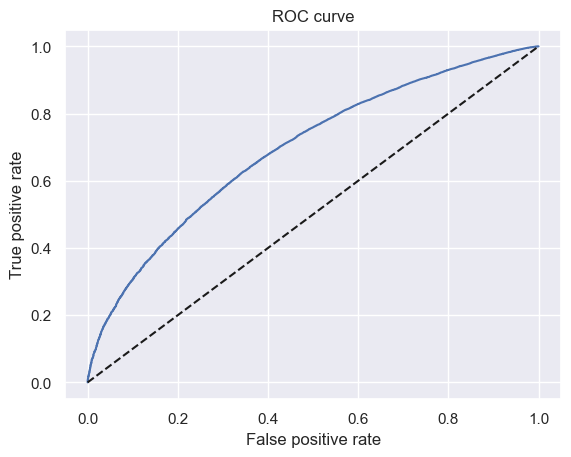

In [268]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [269]:
thresholds

array([       inf, 0.99276993, 0.99130812, ..., 0.39812943, 0.39442921,
       0.37925043])

In [270]:
thresholds.shape

(17318,)

In [271]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
# We concatenate 3 dataframes along the columns.

In [272]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
# We name the columns of the dataframe 'thresholds', 'fpr', and 'tpr'.

In [273]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,inf,0.000000,0.000000
1,0.992770,0.000000,0.000012
2,0.991308,0.000000,0.000096
3,0.991304,0.000099,0.000096
4,0.987209,0.000099,0.004283


In [274]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.

In [275]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.

In [276]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,2049.0
1,0.992770,0.000000,0.000012,797.0
2,0.991308,0.000000,0.000096,783.0
3,0.991304,0.000099,0.000096,783.0
4,0.987209,0.000099,0.004283,753.0


In [277]:
df_cutoffs['Score'][0] = max_score

In [278]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992770,0.000000,0.000012,797.0
2,0.991308,0.000000,0.000096,783.0
3,0.991304,0.000099,0.000096,783.0
4,0.987209,0.000099,0.004283,753.0


In [279]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17313,0.483872,0.999507,0.999976,417.0
17314,0.453229,0.999901,0.999976,408.0
17315,0.398129,0.999901,0.999988,391.0
17316,0.394429,1.000000,0.999988,389.0
17317,0.379250,1.000000,1.000000,385.0


In [280]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [281]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
# Rejection rate equals one minus approval rate.

In [282]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93252,0.000000,1.000000
1,0.992770,0.000000,0.000012,797.0,1,93251,0.000011,0.999989
2,0.991308,0.000000,0.000096,783.0,8,93244,0.000086,0.999914
3,0.991304,0.000099,0.000096,783.0,9,93243,0.000097,0.999903
4,0.987209,0.000099,0.004283,753.0,357,92895,0.003828,0.996172


In [283]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17313,0.483872,0.999507,0.999976,417.0,93245,7,0.999925,0.000075
17314,0.453229,0.999901,0.999976,408.0,93249,3,0.999968,0.000032
17315,0.398129,0.999901,0.999988,391.0,93250,2,0.999979,0.000021
17316,0.394429,1.000000,0.999988,389.0,93251,1,0.999989,0.000011
17317,0.379250,1.000000,1.000000,385.0,93252,0,1.000000,0.000000


In [284]:
df_cutoffs.iloc[5000: 6200, ]
# Here we display the dataframe with cutoffs form line with index 5000 to line with index 6200.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.906127,0.261684,0.533101,595.0,46960,46292,0.503582,0.496418
5001,0.906111,0.261684,0.533233,595.0,46971,46281,0.503700,0.496300
5002,0.906109,0.261783,0.533233,595.0,46972,46280,0.503710,0.496290
5003,0.906081,0.261783,0.533486,595.0,46993,46259,0.503936,0.496064
5004,0.906079,0.261881,0.533486,595.0,46994,46258,0.503946,0.496054
5005,0.906071,0.261881,0.533594,595.0,47003,46249,0.504043,0.495957
5006,0.906067,0.261980,0.533594,595.0,47004,46248,0.504054,0.495946
5007,0.906067,0.261980,0.533618,595.0,47006,46246,0.504075,0.495925
5008,0.906065,0.262078,0.533618,595.0,47007,46245,0.504086,0.495914
5009,0.906063,0.262078,0.533642,595.0,47009,46243,0.504107,0.495893


In [285]:
df_cutoffs.iloc[1000: 2000, ]
# Here we display the dataframe with cutoffs form line with index 1000 to line with index 2000.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.954588,0.050779,0.202334,654.0,17331,75921,0.185851,0.814149
1001,0.954543,0.050779,0.202623,654.0,17355,75897,0.186109,0.813891
1002,0.954543,0.050878,0.202623,654.0,17356,75896,0.186119,0.813881
1003,0.954481,0.050878,0.203080,654.0,17394,75858,0.186527,0.813473
1004,0.954479,0.050976,0.203080,654.0,17395,75857,0.186538,0.813462
1005,0.954475,0.050976,0.203116,654.0,17398,75854,0.186570,0.813430
1006,0.954475,0.051075,0.203116,654.0,17399,75853,0.186580,0.813420
1007,0.954430,0.051075,0.203441,654.0,17426,75826,0.186870,0.813130
1008,0.954430,0.051173,0.203441,654.0,17427,75825,0.186881,0.813119
1009,0.954400,0.051173,0.203574,654.0,17438,75814,0.186999,0.813001


In [286]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [287]:
df_scorecard.to_csv('df_scorecard.csv')